# Pokemon Univariate Visualization of Data

by Collins Kimotho

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read data into a csv Dataframe
path = r"C:\Users\kimotho\Downloads\pokemon.csv"
pokemon = pd.read_csv(path)
pokemon

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,803,poipole,7,0.6,1.8,189,poison,NaN,67,73,67,73,73,67
803,804,naganadel,7,3.6,150.0,243,poison,dragon,73,73,73,121,127,73
804,805,stakataka,7,5.5,820.0,257,rock,steel,61,131,211,13,53,101
805,806,blacephalon,7,1.8,13.0,257,fire,ghost,53,127,53,107,151,79


In [3]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


In [4]:
pokemon.shape

(807, 14)

## Univariate

### 1. Bar Charts

#### Bar Chart Using Seaborn


1. Create a bar chart on a categorical data on the dataset 

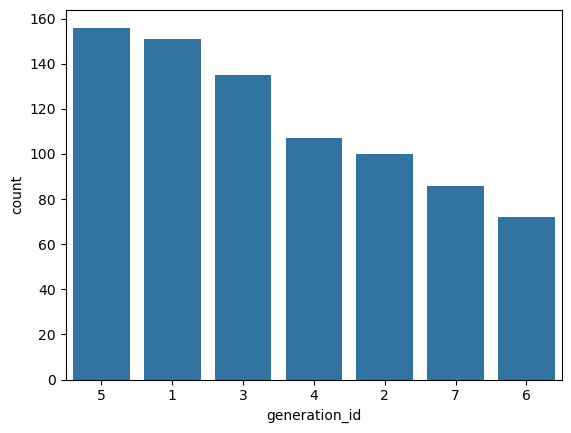

In [5]:
# Create a vertical bar chart using Searborn, with uniform single colo
color= sb.color_palette()[0]

# Static-ordering the bars
order = pokemon['generation_id'].value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the 'generation_id'
sb.countplot(data= pokemon, x= 'generation_id', color=color, order=order);

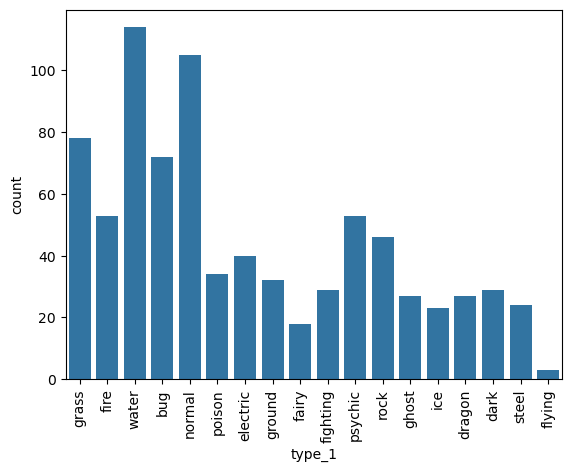

In [6]:
# Plot the pokemon type on a vertical bar chart
sb.countplot(data=pokemon, x='type_1', color=color)

# Use xticks to rotate the category labels( not axes) counter-clockwise
plt.xticks(rotation= 90);

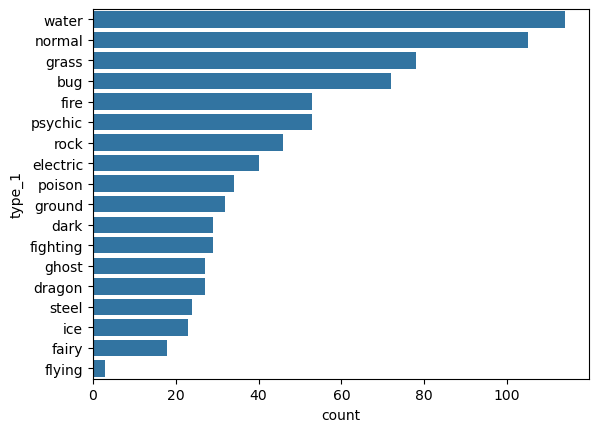

In [7]:
# Plot the pokemon type on a horizontal bar chart
order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=color, order=order);

#### Bar Chart Using the Matplotlib

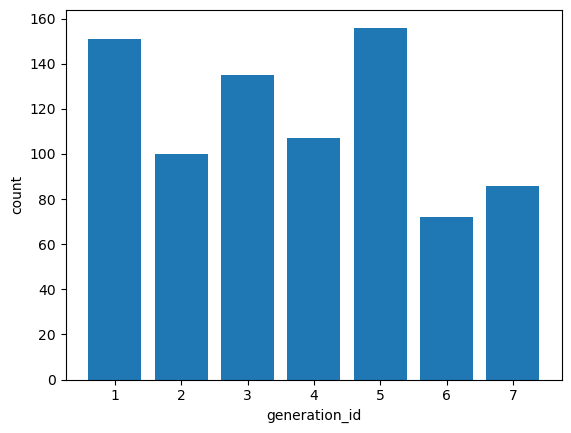

In [8]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)

# Plot the bar chart
plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Display the plt
plt.show()

#### Absolute vs Relative Frequency

In [9]:
# Data Wrangling to reshape the pokemon dataframe
pokemon_types = pokemon.melt(id_vars = ['id', 'species'],
                            value_vars = ['type_1', 'type_2'],
                             var_name = 'type_level',
                             value_name ='type')

pokemon_types.head(10)


,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [10]:
pokemon_types.shape

(1614, 4)

In [11]:
pokemon_types.duplicated().sum()

0

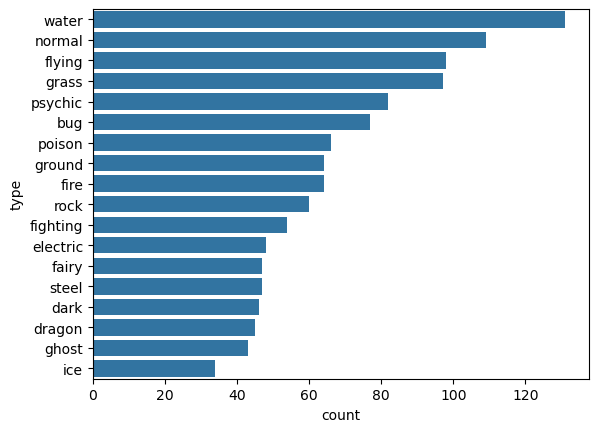

In [12]:
pkmn_order = pokemon_types['type'].value_counts().index
sb.countplot(data= pokemon_types, y= 'type', order= pkmn_order, color=color);

#### Printing the text (proportion) on the bars of a horizontal plot

In [13]:
# Count the frequency of the unique values in the 'type' column
# By default, returns the decreasing order of the frequncy
type_counts = pokemon_types['type'].value_counts() 
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [14]:
# Get the unoque values of the 'type' column, in the decreasig order of the frequency
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

In [15]:
type_counts.shape

(18,)

In [16]:
# Return the sum of all not-null values in the 'type' column
n_pokemon = pokemon_types['type'].value_counts().sum()

# Return the highest frequency in the 'type' column
max_type_count = type_counts[0]

# Compute the lenghth of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [17]:
# use np.arrange() function to produce of a set of evenly spaced proportioned values
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [18]:
# Create a list of string values that can be used as tick labels
tick_names = ['{: 0.2f}'. format(v) for v in tick_props]
tick_names

[' 0.00', ' 0.02', ' 0.04', ' 0.06', ' 0.08', ' 0.10']

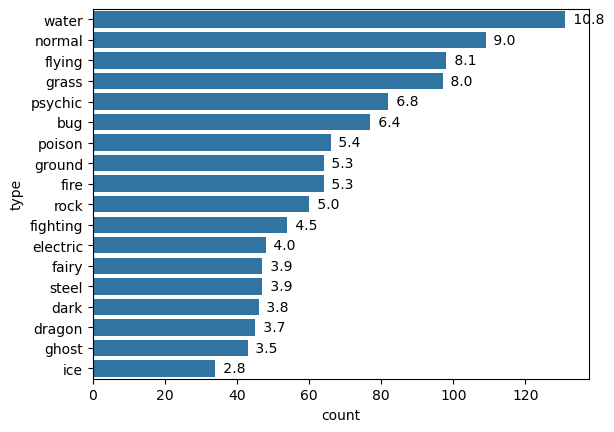

In [19]:
# Plot the horizontal bar graph
sb.countplot(data=pokemon_types, y='type', color=color, order=type_order);

# Print the proportion text on the bars
for i in range(type_counts.shape[0]):    
    count = type_counts[i]
    pct_string = '{: 0.1f}'.format(100*count/n_pokemon) # Convert count into percentage and then into string
    plt.text(count+1, i, pct_string, va='center')  # Print the string value on the bar
    
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,5;

#### Print the text (proportion) on a Vertical plot

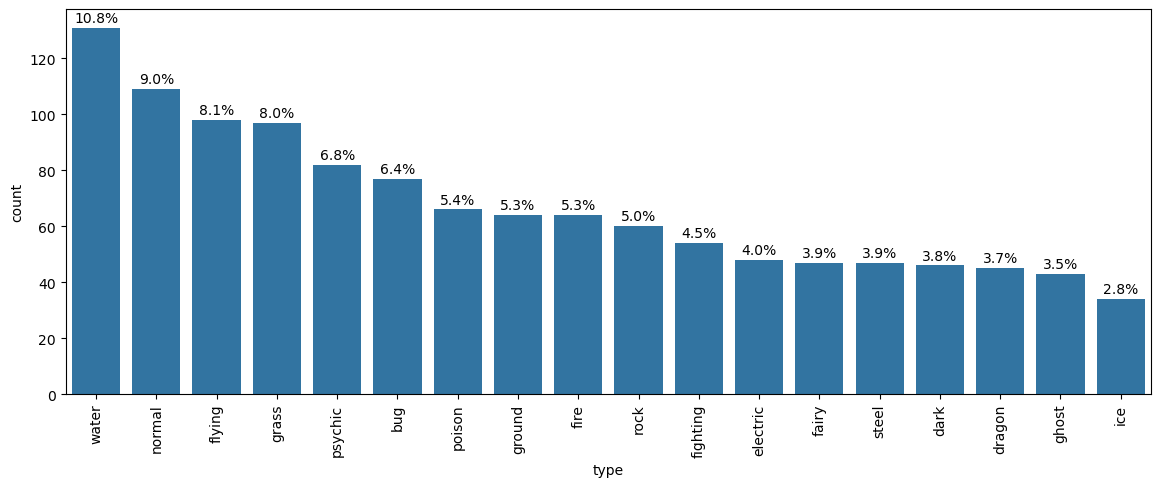

In [20]:
# Plot the chart
sb.countplot(data= pokemon_types, x= 'type', color=color, order= type_order)

# Calculating the type_counts
type_counts = pokemon_types['type'].value_counts()

# Get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90)

# Loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]  # get the text property for the label to get the correct count
    pct_string = '{:0.1f}%'. format (100*count/n_pokemon)
    plt.text(loc, count+2, pct_string, ha= 'center', color='black')  # print the annotation just below the top of the bar
    
rcParams['figure.figsize'] = 14, 5

## 2. Pie Chart

### Plot a pie chart using matplotlib

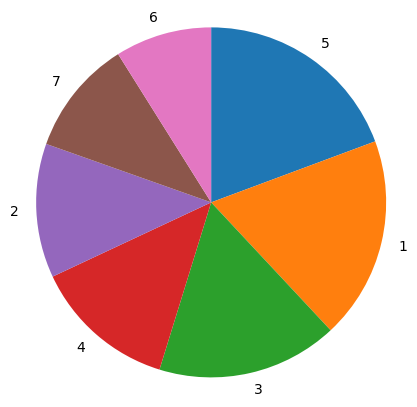

In [21]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False)
plt.axis('square');

### Plot a simple Donut plot

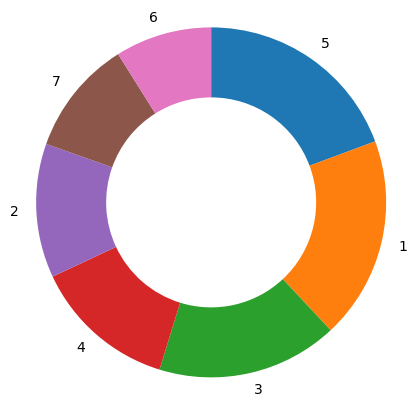

In [22]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

## 3. Histogram

#### Ploting a Histogram using matplotlib

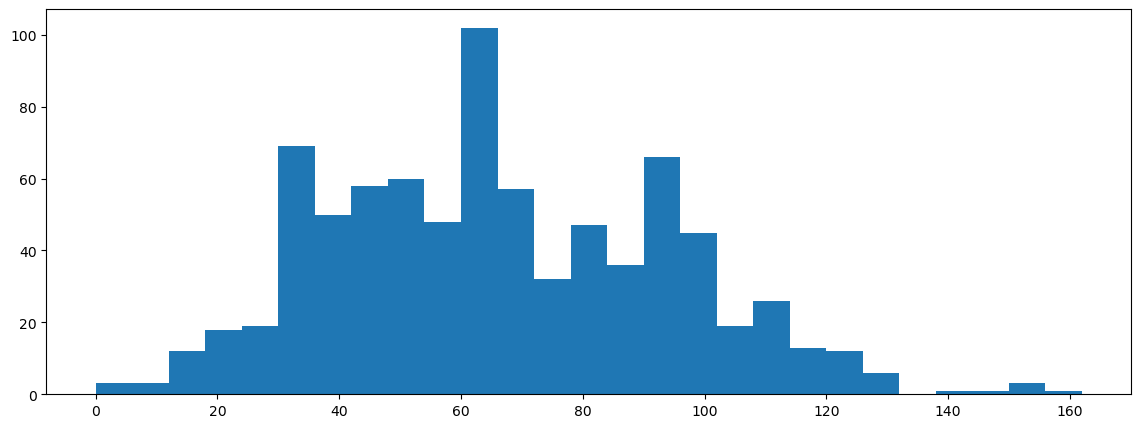

In [31]:
bins = np.arange(0, pokemon['speed'].max()+6, 6)
plt.hist(data = pokemon, x = 'speed', bins=bins);

#### Ploting a Histogram using Seaborn

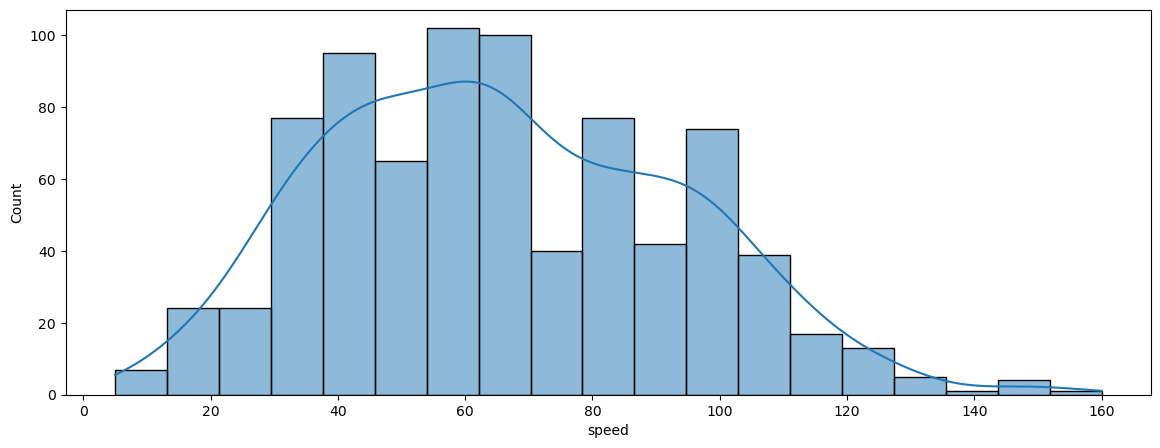

In [35]:
sb.histplot(pokemon['speed'], kde = True);

End